# Bulding ML pipeline for Reactor data

**Course: Applied AI in Chemical and Process Engineering**


**Week 3/4**

This notebook witll build a pipeline to prepare data and develop an ML algorithm

Content:

Part 1

*   Data loading
*   Data exploration
*   Quality Checks
*   Visualization

Part 2
*   Normalization
*   Model training, validation and testing
*   Predictions
*   Optimization

In [14]:
# Load all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.optimize import minimize
from sklearn.impute import SimpleImputer

# Data Preperation


In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/dissabnd/Applied-AI-in-Chemical-and-Process-Engineering/refs/heads/main/data/Wine_Quality_Data_noisy.csv')

In [16]:
# prompt: list all columns

df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [17]:
# Print data table
df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


In [18]:
# Size of the data table

df.shape

(6497, 13)

# Data Cleaning

In [19]:
# prompt: make a new table (dfnum) without last column of df

# Remove the last column
dfnum = df.iloc[:, :-1]


# Display the first few rows of the new dataframe
dfnum

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Check for missing data

In [20]:
print(dfnum.isna().sum())

fixed_acidity           10
volatile_acidity        10
citric_acid             10
residual_sugar           0
chlorides                0
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64


## Fill the missing data wiht median using imputer

In [21]:
imputer = SimpleImputer(strategy='median')

dfnum2 = pd.DataFrame(imputer.fit_transform(dfnum), columns=dfnum.columns)
print(dfnum2.isna().sum())

print (dfnum2.shape)

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
(6497, 12)


In [22]:
dfnum2

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


## Check for duplicates

In [23]:
print("Number of duplicate rows:", dfnum2.duplicated().sum())

print("shape with duplciates:", dfnum2.shape)

Number of duplicate rows: 1173
shape with duplciates: (6497, 12)


In [24]:
dfnum3=dfnum2.drop_duplicates()

print("shape without duplciates:", dfnum3.shape)

shape without duplciates: (5324, 12)


## Summary Stats

In [25]:
# prompt: print summary stats of df3

dfnum3.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5324.000000,5324.000000,5324.000000,5324.000000,5324.00000,5324.000000,5324.000000,5324.000000,5324.000000,5324.000000,5324.000000,5324.000000
mean,7.254085,0.348306,0.322919,5.049953,0.05669,30.027423,114.092412,0.994536,3.224619,0.533439,10.549542,5.795455
std,1.809989,0.215412,0.204953,4.499463,0.03685,17.799515,56.769231,0.002964,0.160407,0.149753,1.185737,0.879586
min,3.800000,0.080000,0.000000,0.600000,0.00900,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.03800,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.04700,28.000000,116.000000,0.994660,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.06600,41.000000,153.000000,0.996770,3.330000,0.600000,11.400000,6.000000
max,47.700000,4.740000,4.980000,65.800000,0.61100,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Data Visualization

## Pair plot

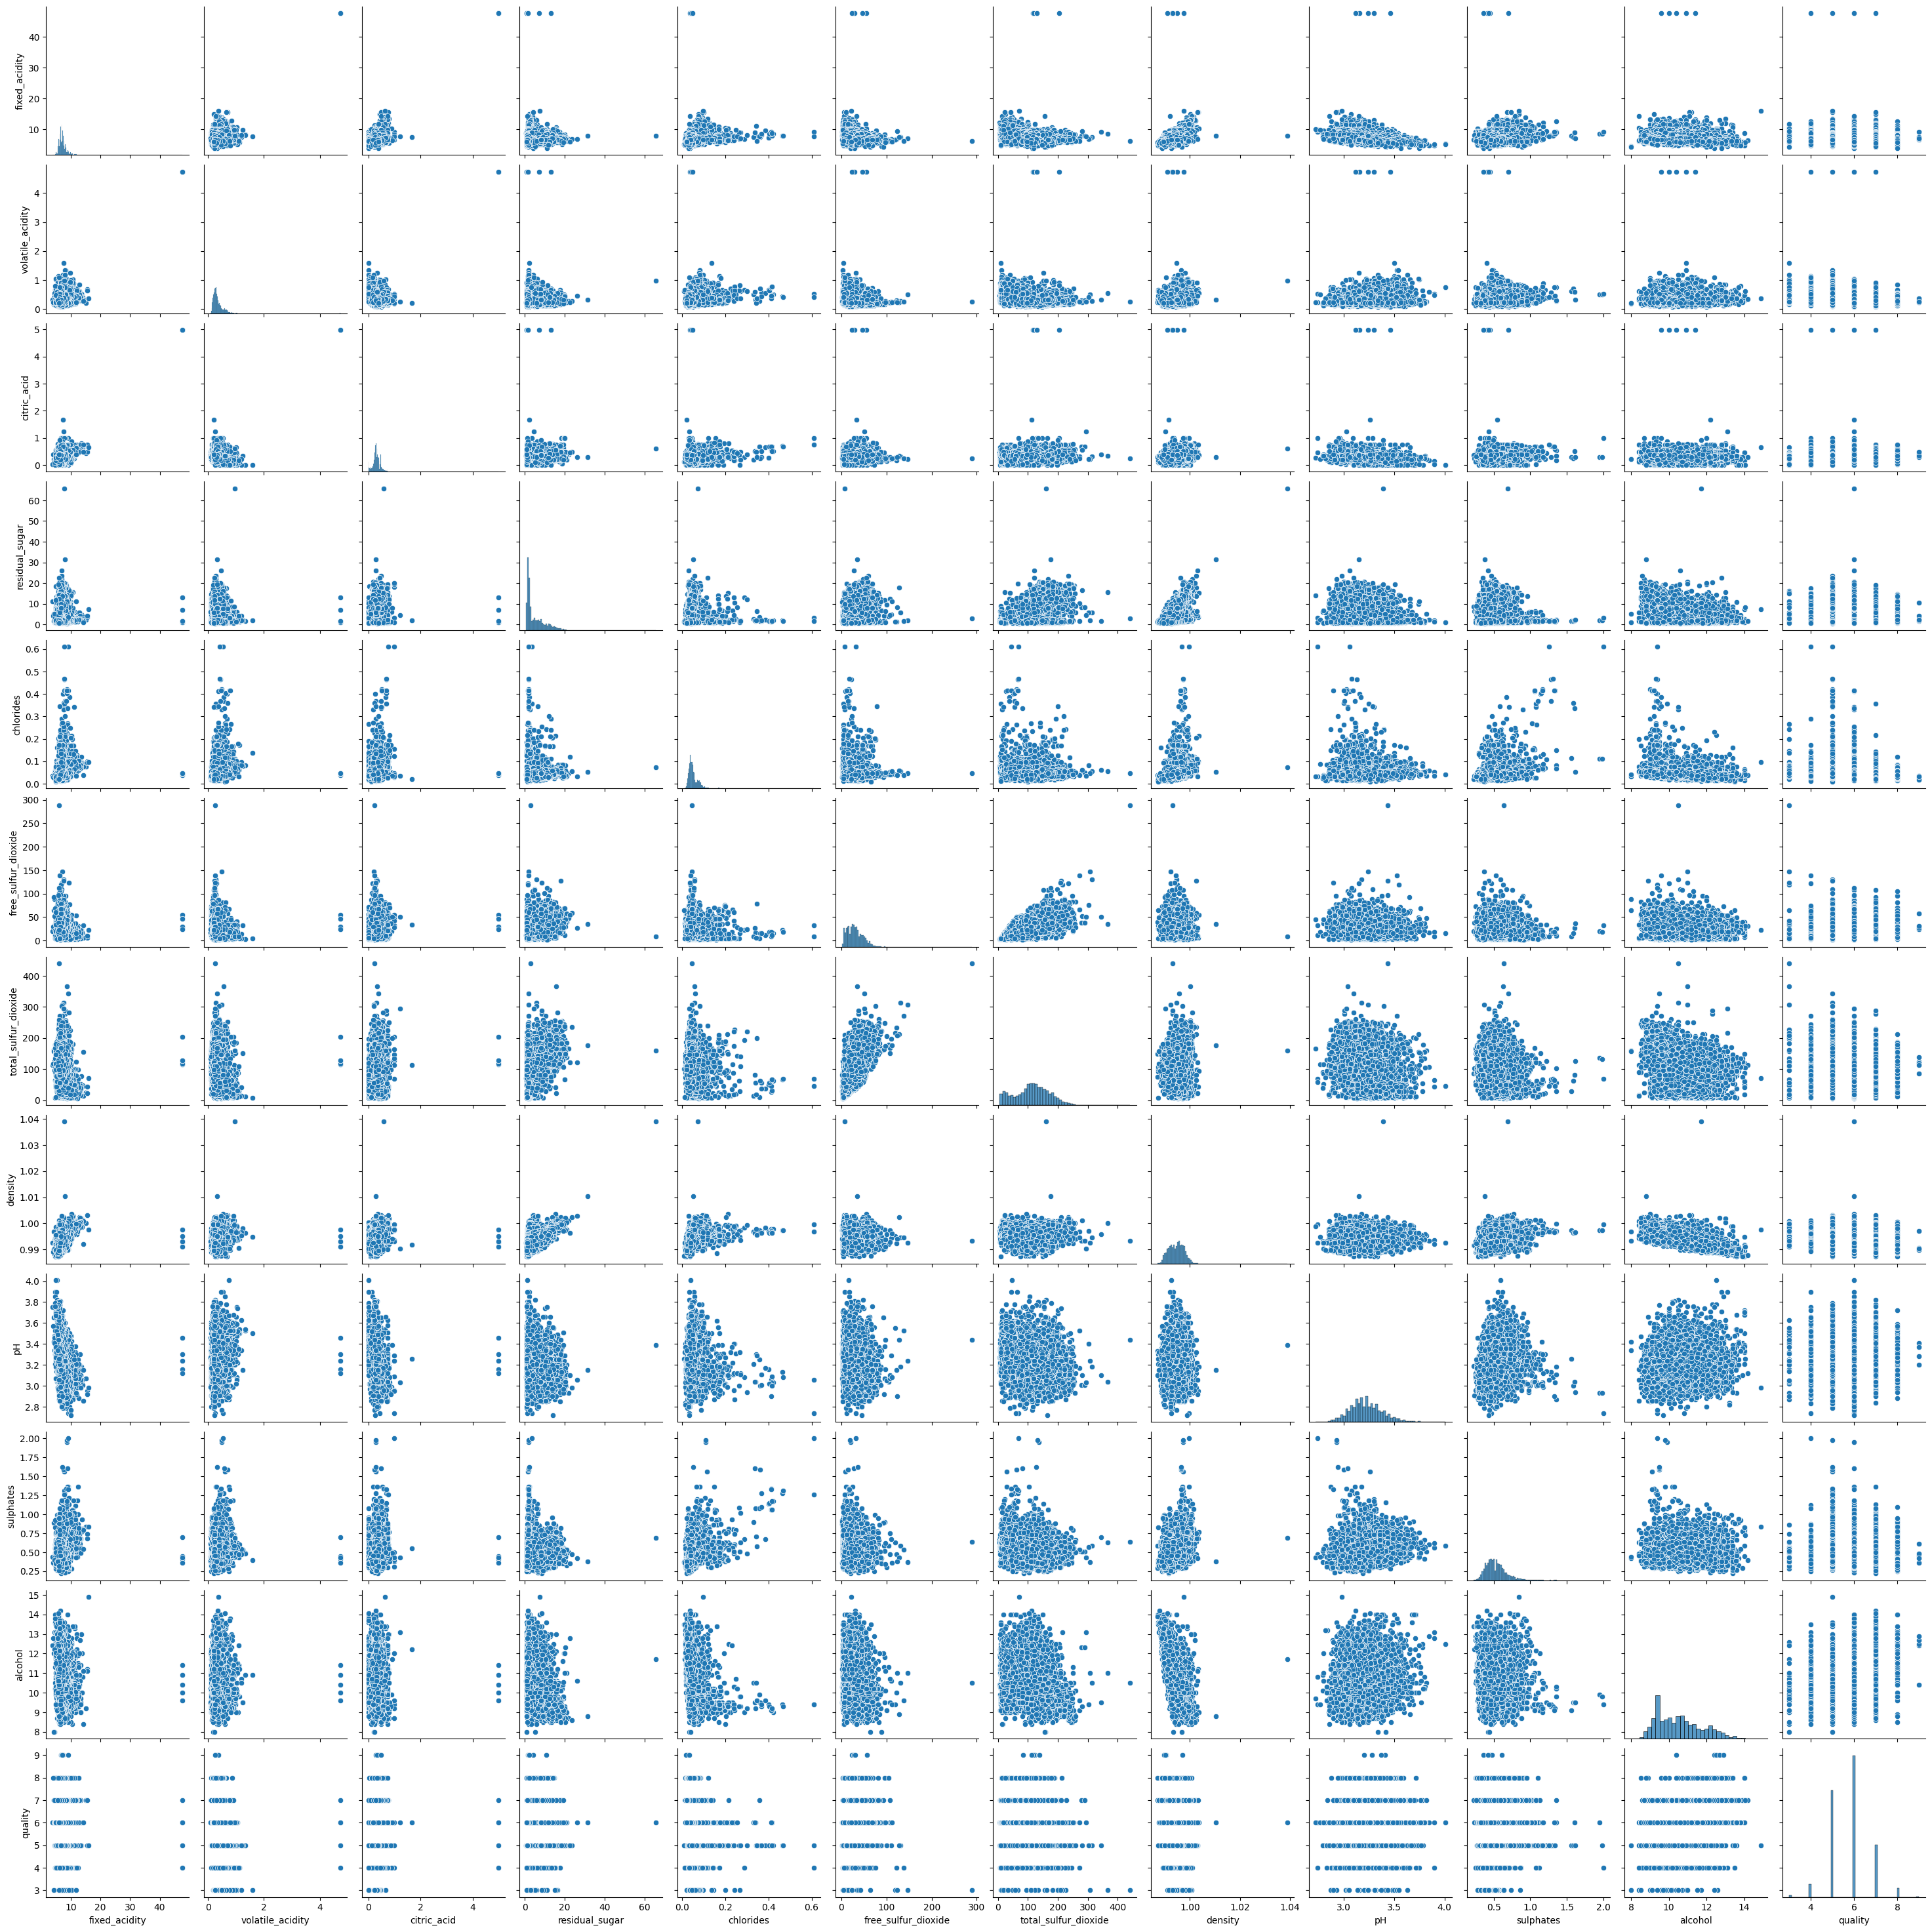

In [26]:
# prompt: do a scatter matrix for all variables

# ## Data Visualization with Pair Plot (Scatter Matrix)
sns.pairplot(dfnum3)
plt.show()

## Data Visualization with Box Plot

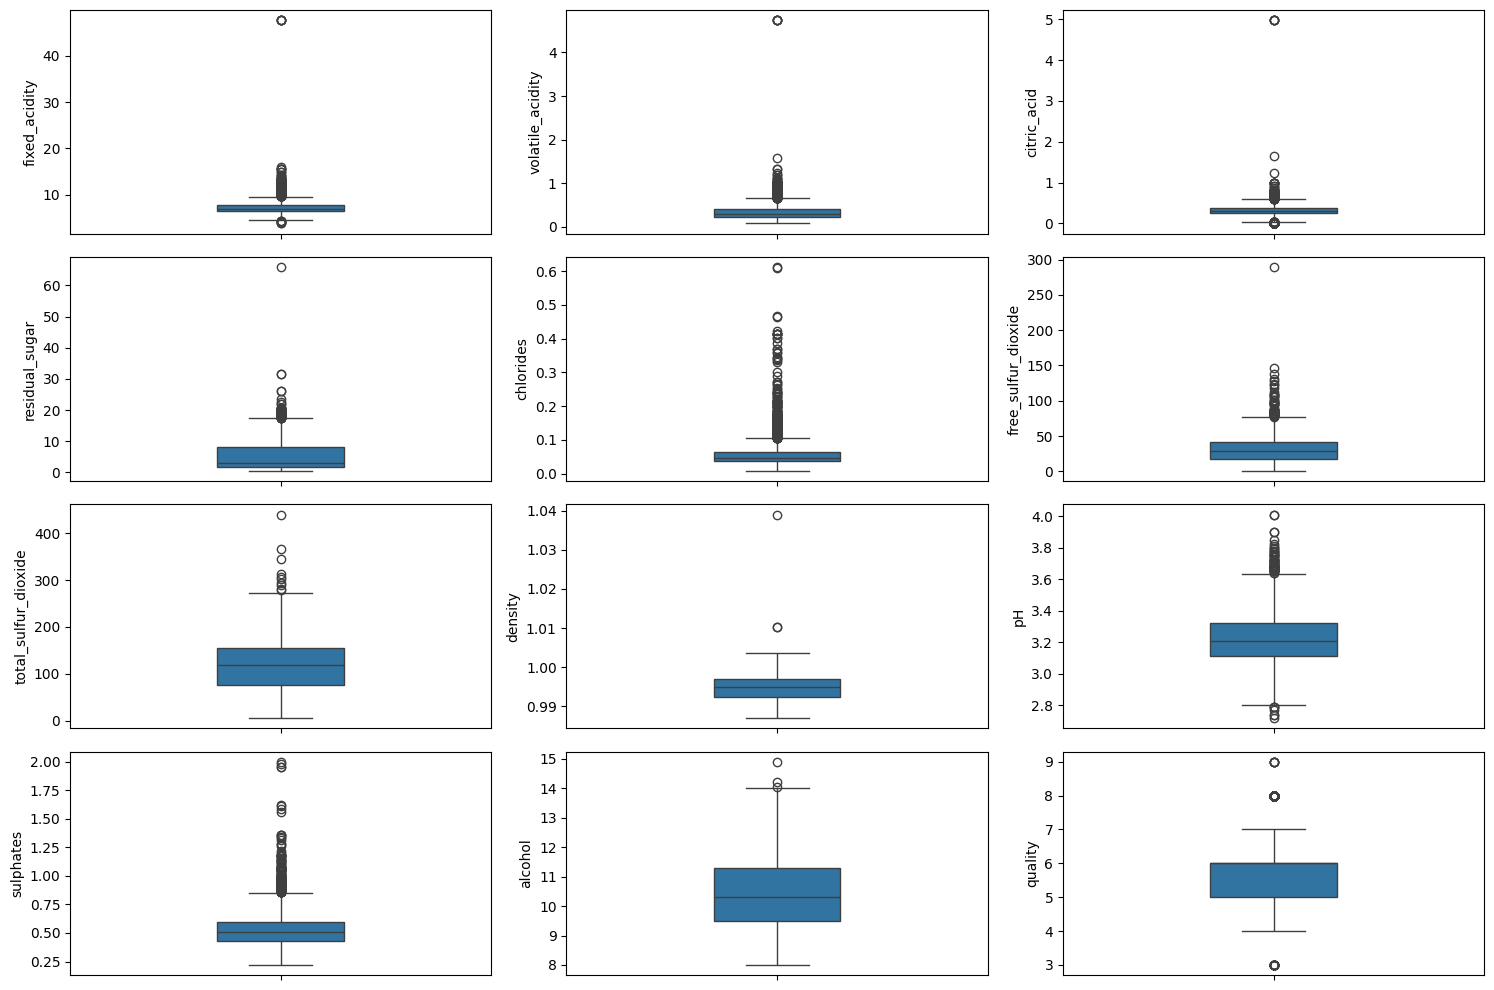

In [32]:
# prompt: create box plots for all variables in multiple plots in single figure. show outliers

plt.figure(figsize=(15, 10))
for i, var in enumerate(dfnum3.columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df[var], showfliers=True, width=.3)
plt.tight_layout()
plt.show()

## Data Visualization with Violine plot

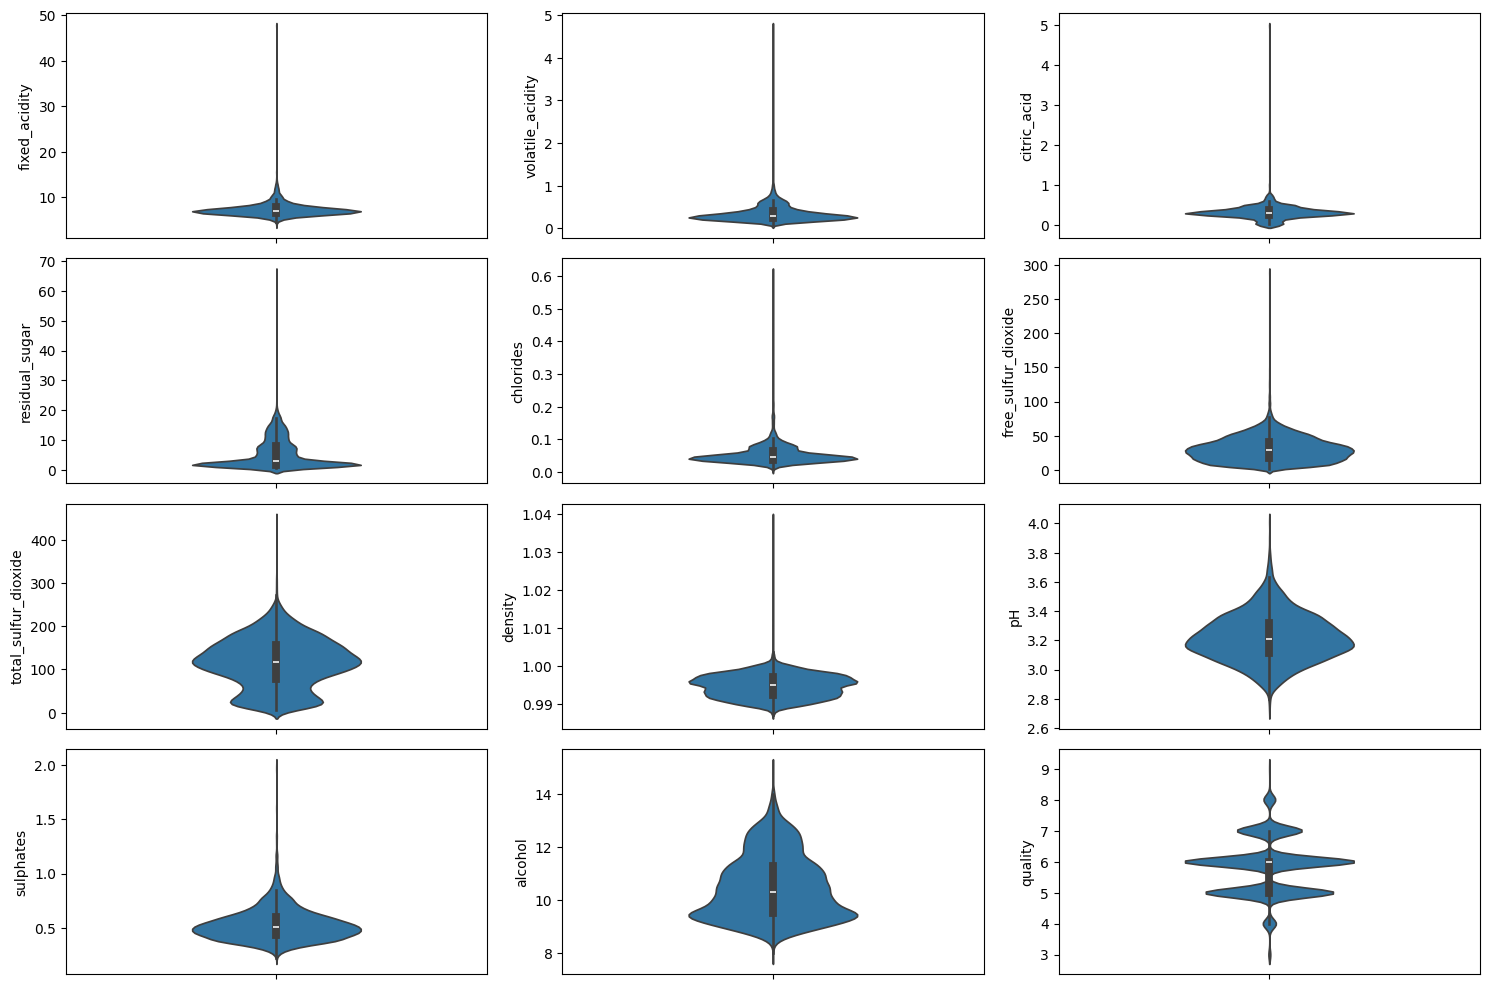

In [34]:
# prompt: do the same thing with violin plot instead of box plot


plt.figure(figsize=(15, 10))
for i, var in enumerate(dfnum3.columns):
    plt.subplot(4, 3, i + 1)
    sns.violinplot(y=df[var], width=.4)
plt.tight_layout()
plt.show()

## Data Visualization with Histogram plot

array([[<Axes: title={'center': 'fixed_acidity'}>,
        <Axes: title={'center': 'volatile_acidity'}>,
        <Axes: title={'center': 'citric_acid'}>],
       [<Axes: title={'center': 'residual_sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free_sulfur_dioxide'}>],
       [<Axes: title={'center': 'total_sulfur_dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

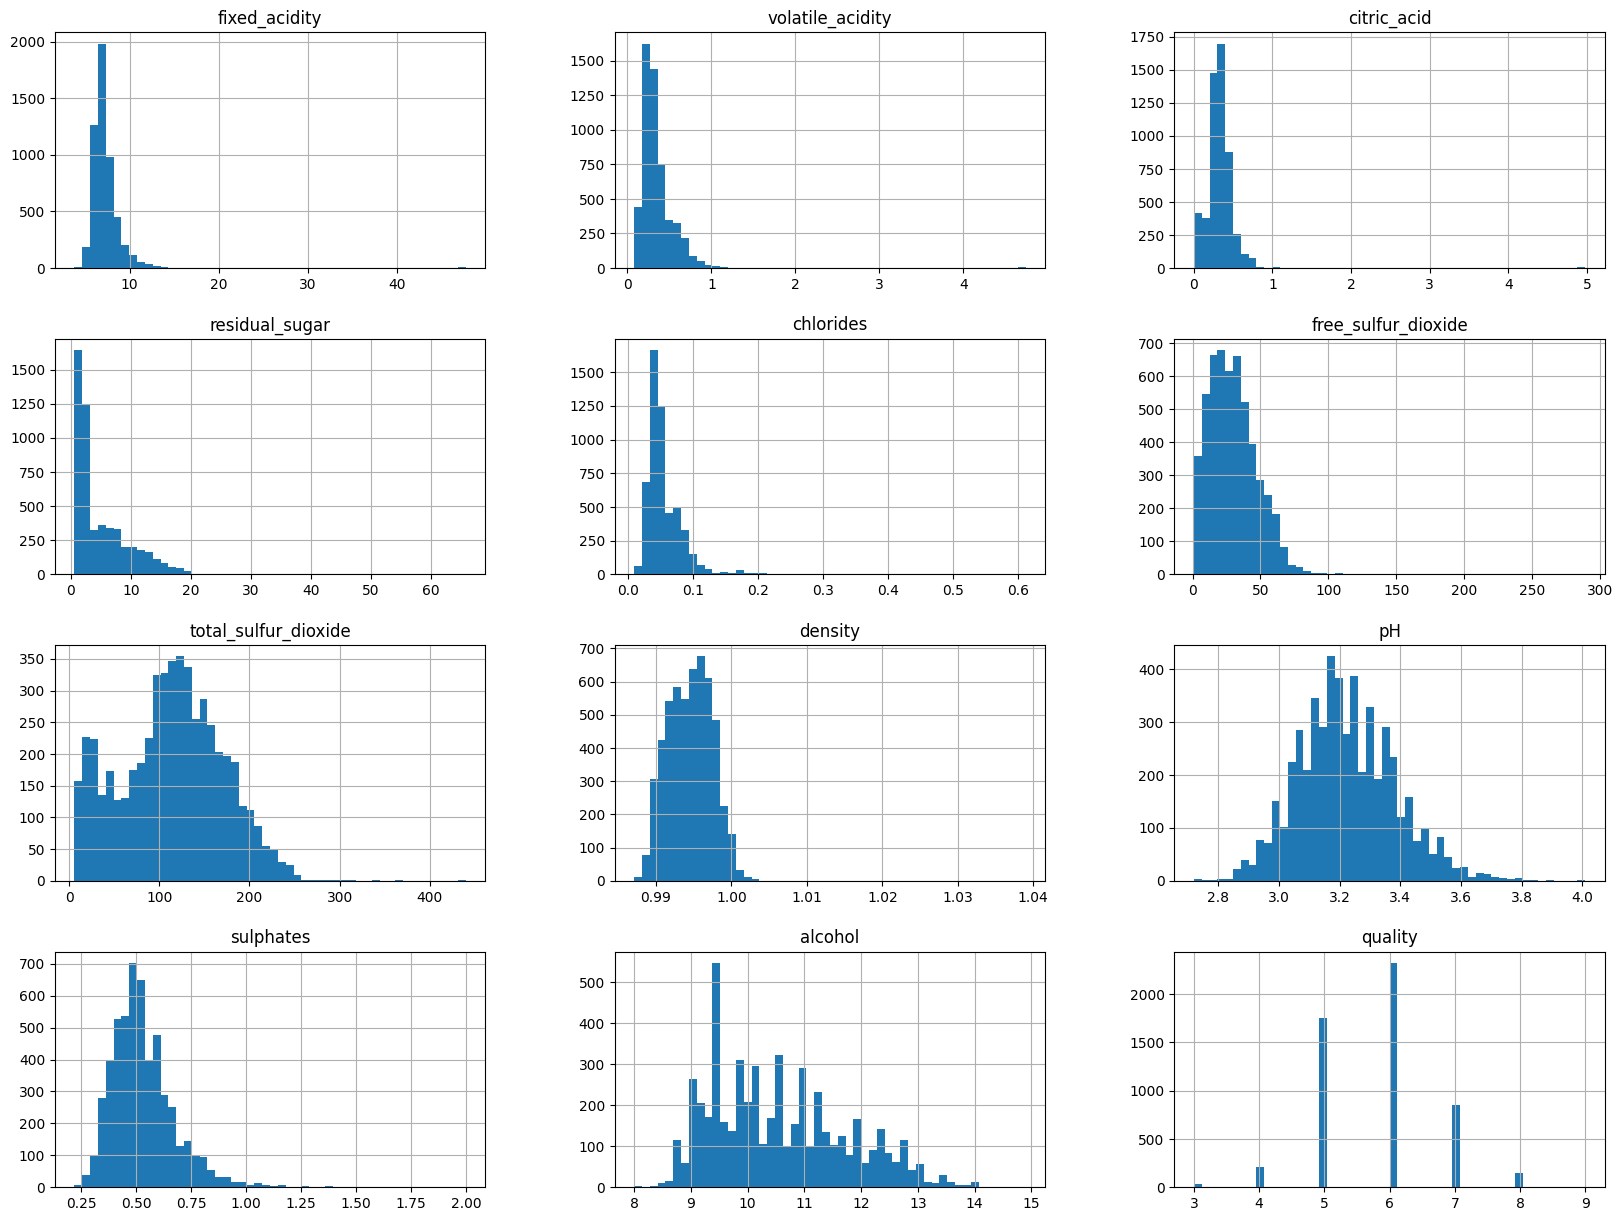

In [35]:
dfnum3.hist(bins=50, figsize=(20,15))

## Check Correlations

In [36]:
# prompt: print correlations matrix and do a plot a heatmap of correlation

# calculate correlations
correlations = dfnum3.corr()

# print correlations matrix
correlations


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.550135,0.649852,-0.076329,0.202838,-0.197468,-0.228939,0.343675,-0.193309,0.212567,-0.076662,-0.062423
volatile_acidity,0.550135,1.000000,0.220181,-0.128500,0.280095,-0.265417,-0.303974,0.236221,0.196286,0.169076,-0.052803,-0.211295
citric_acid,0.649852,0.220181,1.000000,0.104030,0.031989,0.101320,0.149486,0.062961,-0.242761,0.033299,-0.005798,0.065578
residual_sugar,-0.076329,-0.128500,0.104030,1.000000,-0.123491,0.399087,0.487631,0.520650,-0.234686,-0.175445,-0.305389,-0.057088
chlorides,0.202838,0.280095,0.031989,-0.123491,1.000000,-0.186452,-0.269920,0.371735,0.026300,0.404937,-0.269427,-0.201672
free_sulfur_dioxide,-0.197468,-0.265417,0.101320,0.399087,-0.186452,1.000000,0.720450,0.006327,-0.141648,-0.198423,-0.169992,0.053941
total_sulfur_dioxide,-0.228939,-0.303974,0.149486,0.487631,-0.269920,0.720450,1.000000,0.006546,-0.223306,-0.276075,-0.249327,-0.050691
density,0.343675,0.236221,0.062961,0.520650,0.371735,0.006327,0.006546,1.000000,0.034581,0.282448,-0.667584,-0.326019
pH,-0.193309,0.196286,-0.242761,-0.234686,0.026300,-0.141648,-0.223306,0.034581,1.000000,0.168354,0.097725,0.040397
sulphates,0.212567,0.169076,0.033299,-0.175445,0.404937,-0.198423,-0.276075,0.282448,0.168354,1.000000,-0.017042,0.042110


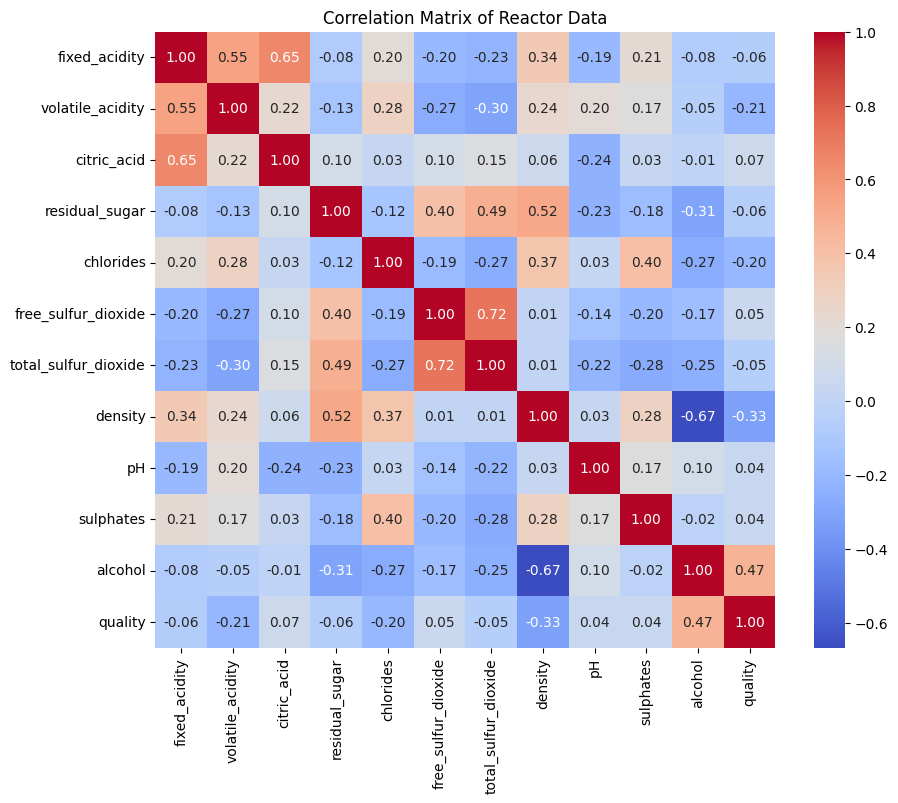

In [37]:
# plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Reactor Data')
plt.show()

# Outliers

**Strategy:** We will use statistical methods to remove outliers (IQR)

In [38]:
# prompt: remove all outliers of dfnum3 using IQR method and create a table called dfclean

# Apply IQR method to remove outliers
Q1 = dfnum3.quantile(0.25)
Q3 = dfnum3.quantile(0.75)
IQR = Q3 - Q1

dfclean = dfnum3[~((dfnum3 < (Q1 - 1.5 * IQR)) |(dfnum3 > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Original shape:", dfnum3.shape)
print("Shape after outlier removal:", dfclean.shape)
dfclean.head()

Original shape: (5324, 12)
Shape after outlier removal: (4079, 12)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5.0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7.0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5.0


## Histogram plot with cleaned data

array([[<Axes: title={'center': 'fixed_acidity'}>,
        <Axes: title={'center': 'volatile_acidity'}>,
        <Axes: title={'center': 'citric_acid'}>],
       [<Axes: title={'center': 'residual_sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free_sulfur_dioxide'}>],
       [<Axes: title={'center': 'total_sulfur_dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

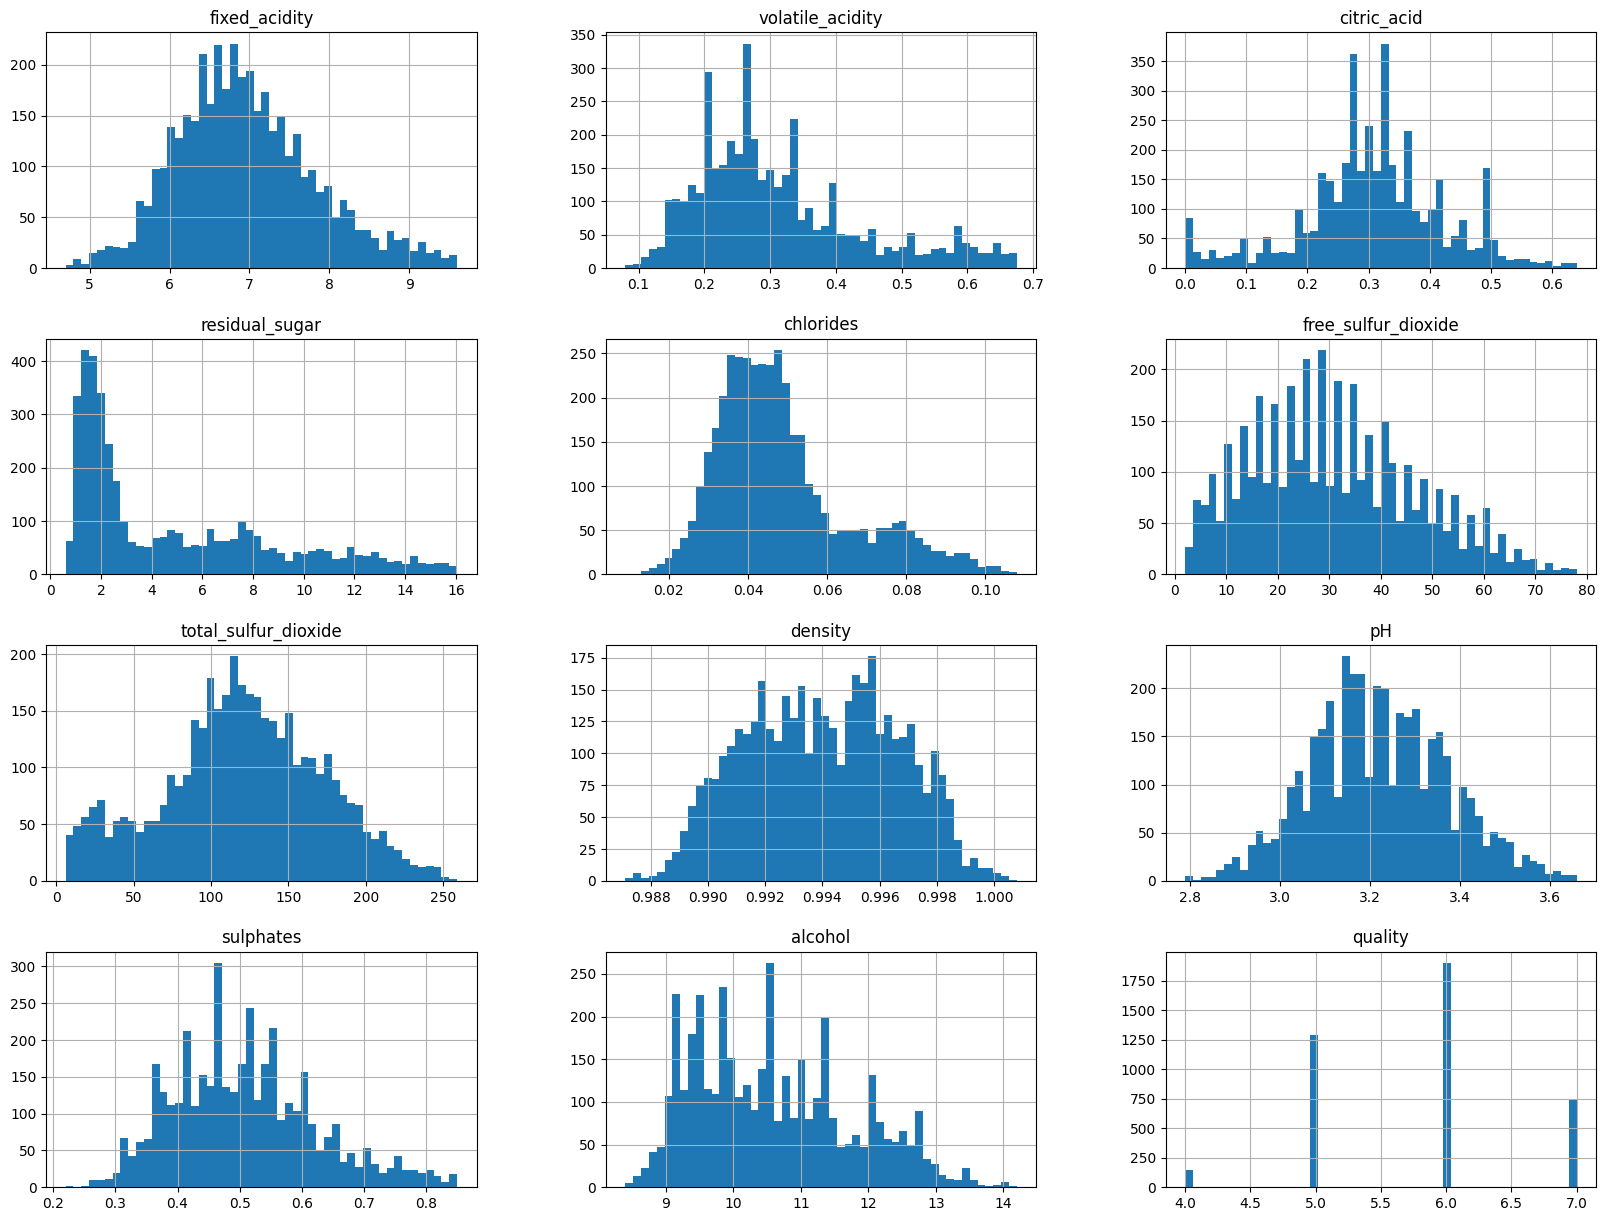

In [39]:
dfclean.hist(bins=50, figsize=(20,15))

# ML Pipeline

## Normalization

In [41]:
# prompt: normalize the data using min-max scaling for dfcleaned. create a new df called dfnorm

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dfnorm = pd.DataFrame(scaler.fit_transform(dfclean), columns=dfclean.columns)
dfnorm

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.551020,0.974790,0.000000,0.077670,0.666667,0.144737,0.134387,0.780862,0.827586,0.539683,0.172414,0.333333
1,0.653061,0.873950,0.093750,0.064725,0.606061,0.171053,0.209486,0.678598,0.586207,0.380952,0.172414,0.333333
2,0.530612,0.957983,0.000000,0.038835,0.565657,0.171053,0.059289,0.547115,0.689655,0.396825,0.275862,1.000000
3,0.632653,0.840336,0.031250,0.090615,0.646465,0.092105,0.047431,0.707816,0.655172,0.555556,0.189655,1.000000
4,0.571429,0.705882,0.562500,0.355987,0.626263,0.197368,0.379447,0.780862,0.643678,0.920635,0.362069,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
4074,0.306122,0.218487,0.453125,0.064725,0.303030,0.289474,0.339921,0.294375,0.551724,0.444444,0.482759,0.666667
4075,0.387755,0.403361,0.562500,0.478964,0.383838,0.723684,0.640316,0.569028,0.413793,0.380952,0.206897,0.333333
4076,0.367347,0.268908,0.296875,0.038835,0.323232,0.368421,0.415020,0.396640,0.229885,0.380952,0.172414,0.666667
4077,0.163265,0.352941,0.468750,0.032362,0.131313,0.236842,0.411067,0.115413,0.632184,0.253968,0.758621,1.000000


## Visualize normalized data

array([[<Axes: title={'center': 'fixed_acidity'}>,
        <Axes: title={'center': 'volatile_acidity'}>,
        <Axes: title={'center': 'citric_acid'}>],
       [<Axes: title={'center': 'residual_sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free_sulfur_dioxide'}>],
       [<Axes: title={'center': 'total_sulfur_dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

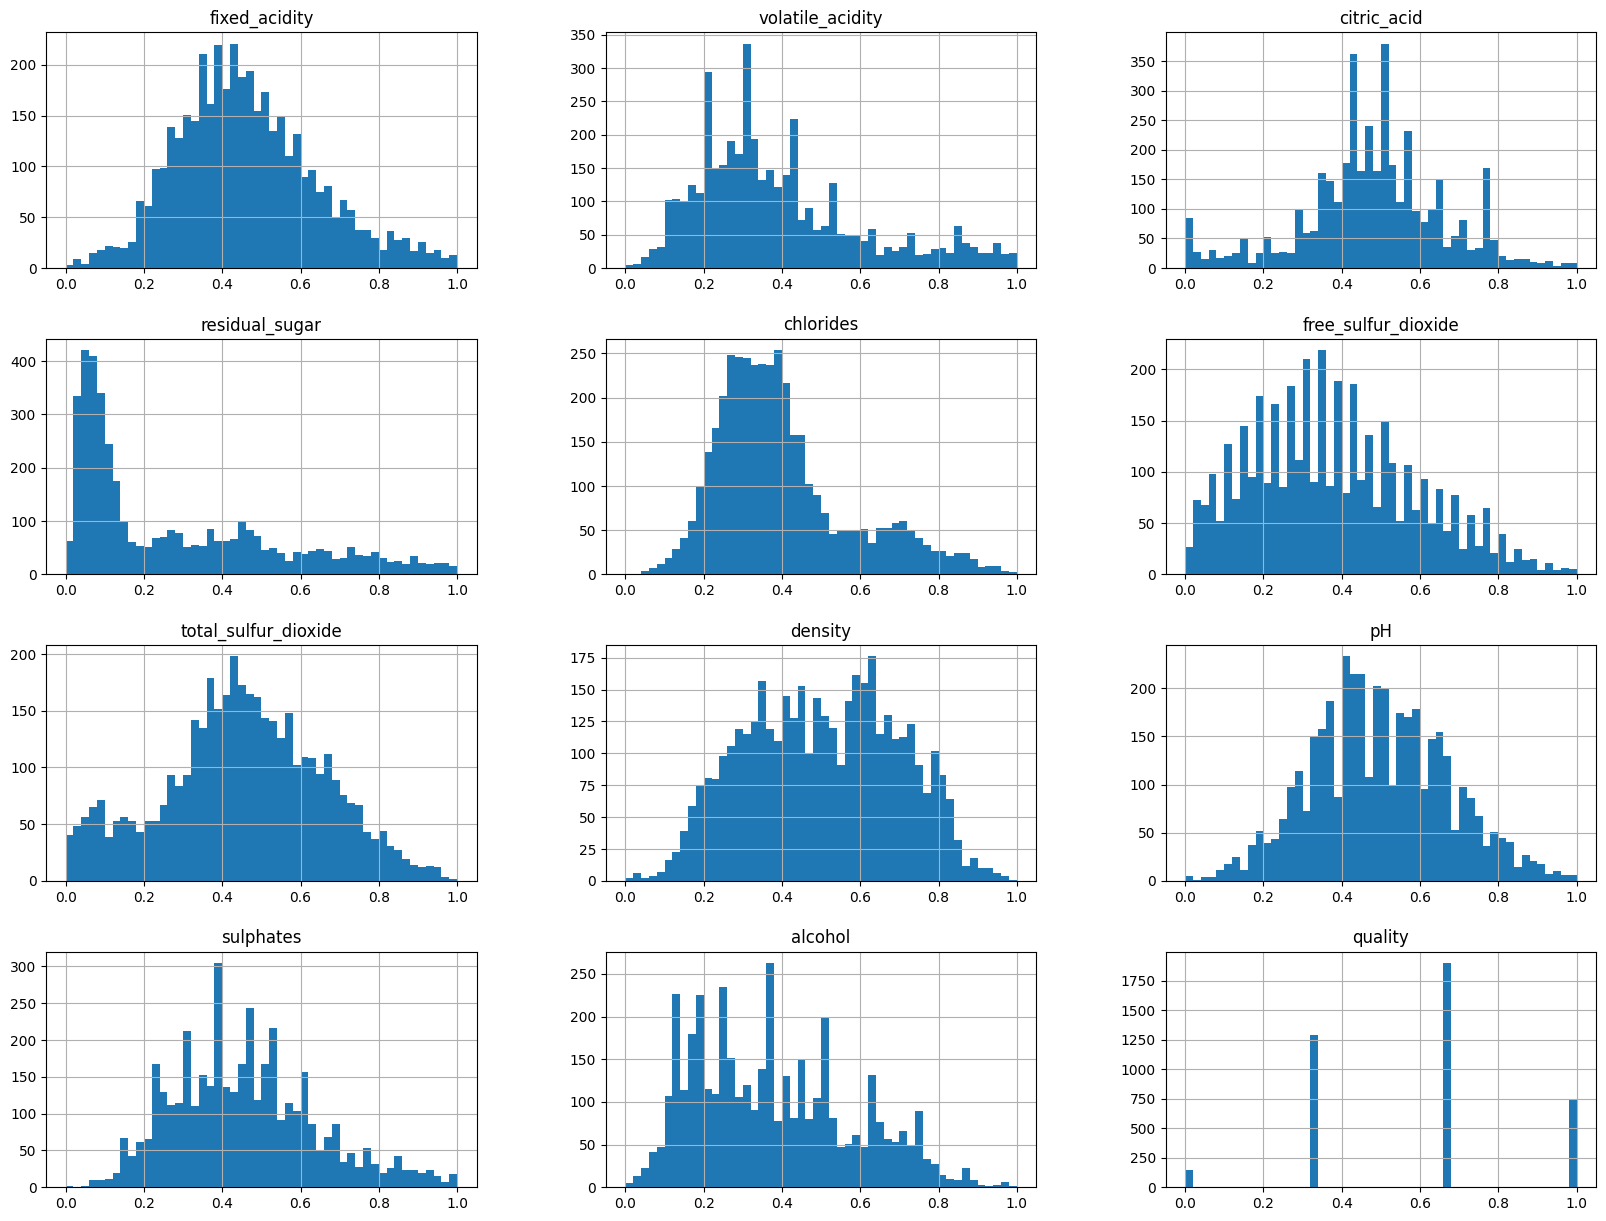

In [42]:
dfnorm.hist(bins=50, figsize=(20,15))

## Data Split

In [43]:
# prompt: split data into train and test with 70/30 strategy. y='quality'

# Separate features (X) and target (y)
X = dfnorm.drop('quality', axis=1)
y = dfnorm['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2855, 11)
Shape of X_test: (1224, 11)
Shape of y_train: (2855,)
Shape of y_test: (1224,)


# Random Forest Model

## Grid Search for Hyper parameter tuning

In [ ]:
# prompt: create grid search to build a RF model. show the training RMSE, R2 and test RMSE, R2. Show the best model and hyper parameters

from sklearn.metrics import mean_squared_error
import math

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                            param_grid=param_grid,
                            cv=5,  # 5-fold cross-validation
                            scoring='neg_mean_squared_error', # Use negative MSE to maximize
                            n_jobs=-1) # Use all available cores

# Fit the grid search to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the training set
y_train_pred_rf = best_rf_model.predict(X_train)

# Make predictions on the test set
y_test_pred_rf = best_rf_model.predict(X_test)

# Calculate RMSE and R2 for the training set
train_rmse_rf = math.sqrt(mean_squared_error(y_train, y_train_pred_rf))
train_r2_rf = r2_score(y_train, y_train_pred_rf)

# Calculate RMSE and R2 for the test set
test_rmse_rf = math.sqrt(mean_squared_error(y_test, y_test_pred_rf))
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print("Random Forest Model Evaluation:")
print(f"Training RMSE: {train_rmse_rf:.4f}")
print(f"Training R2: {train_r2_rf:.4f}")
print(f"Test RMSE: {test_rmse_rf:.4f}")
print(f"Test R2: {test_r2_rf:.4f}")
print("\nBest Random Forest Model Hyperparameters:")
grid_search_rf.best_params_

## Final model with optimized paramters

In [ ]:
# prompt: lets build xgboost model with hyper parameter optimization

# ## XGBoost Model
# ## Grid Search for Hyper parameter tuning

# Define the parameter grid for GridSearchCV for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

# Initialize the GridSearchCV object for XGBoost
grid_search_xgb = GridSearchCV(estimator=XGBRegressor(random_state=42),
                             param_grid=param_grid_xgb,
                             cv=5,  # 5-fold cross-validation
                             scoring='neg_mean_squared_error', # Use negative MSE to maximize
                             n_jobs=-1) # Use all available cores

# Fit the grid search to the training data
grid_search_xgb.fit(X_train, y_train)

# Get the best model from the grid search
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions on the training set
y_train_pred_xgb = best_xgb_model.predict(X_train)

# Make predictions on the test set
y_test_pred_xgb = best_xgb_model.predict(X_test)

# Calculate RMSE and R2 for the training set
train_rmse_xgb = math.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)

# Calculate RMSE and R2 for the test set
test_rmse_xgb = math.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

print("XGBoost Model Evaluation:")
print(f"Training RMSE: {train_rmse_xgb:.4f}")
print(f"Training R2: {train_r2_xgb:.4f}")
print(f"Test RMSE: {test_rmse_xgb:.4f}")
print(f"Test R2: {test_r2_xgb:.4f}")
print("\nBest XGBoost Model Hyperparameters:")
grid_search_xgb.best_params_
